# Membaca Dataset

In [1]:
#mengimport library Pandas
import pandas as pd
pd.set_option('display.max_column', 20)

#membaca dataset credit_scoring_dqlab dari file excel
df_credit_scoring = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')

print(df_credit_scoring.head())

  kode_kontrak  pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0   AGR-000001                      295        YA                     48   
1   AGR-000011                      271        YA                     36   
2   AGR-000030                      159     TIDAK                     12   
3   AGR-000043                      210        YA                     12   
4   AGR-000049                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


# Mengubah Kolom Non-numerik Menjadi Kolom Numerik

In [3]:
#mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0
df_credit_scoring['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0], inplace=True)

print(df_credit_scoring.head())

  kode_kontrak  pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0   AGR-000001                      295          1                     48   
1   AGR-000011                      271          1                     36   
2   AGR-000030                      159          0                     12   
3   AGR-000043                      210          1                     12   
4   AGR-000049                      165          0                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


In [4]:
#Label Encoding rata_rata_overdue , untuk menghilangkan value string, sehingga bisa dibuat dalam bentuk numeric array, dan tidak error saat membuat modelnya
df_credit_scoring['rata_rata_overdue'].replace({
	'0 - 30 days':1,
	'31 - 45 days':2,
	'46 - 60 days':3,
	'61 - 90 days':4,
	'> 90 days':5
}, inplace=True)

print(df_credit_scoring.head())

  kode_kontrak  pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0   AGR-000001                      295          1                     48   
1   AGR-000011                      271          1                     36   
2   AGR-000030                      159          0                     12   
3   AGR-000043                      210          1                     12   
4   AGR-000049                      165          0                     36   

   jumlah_tanggungan  rata_rata_overdue  risk_rating  
0                  5                  4            4  
1                  5                  4            4  
2                  0                  1            1  
3                  3                  3            3  
4                  0                  2            2  


/tmp/ipython-input-4-2689194034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_credit_scoring['rata_rata_overdue'].replace({
/tmp/ipython-input-4-2689194034.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_credit_scoring['rata_rata_overdue'].replace({


# Membuat Variabel Independen dan Dependen

In [5]:
#untuk X (independent variables), data yang dimasukkan semua persyaratan untuk membuat risk_rating (dependent variable), tidak memerlukan kode_kontrak. Selain itu rata_rata_overdue juga dikeluarkan karena merupakan transformasi numerik dari risk_rating sehingga kolom kode_kontrak, rata_rata_overdue dan risk_rating dibuang
X = df_credit_scoring.drop(columns=['kode_kontrak', 'risk_rating', 'rata_rata_overdue']).values
print('Ukuran varibel independen X: ', X.shape)

#untuk y (target/dependent variable) adalah target nilai yang harus dibuat sistem ketika membaca data X isinya adalah kolom risk_rating
y = df_credit_scoring['risk_rating'].values
print('Ukuran varibel dependen y: ', y.shape)

Ukuran varibel independen X:  (900, 4)
Ukuran varibel dependen y:  (900,)


# Membagi Data Training dan Data Testing

In [6]:
#membagi data training dan data testing, di mana training 70% dan testing 30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#menampilkan jumlah data train dan test
print('Shape of X_train:', X_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train: (630, 4)
Shape of X_test : (270, 4)
Shape of y_train: (630,)
Shape of y_test : (270,)


# Membangun Model

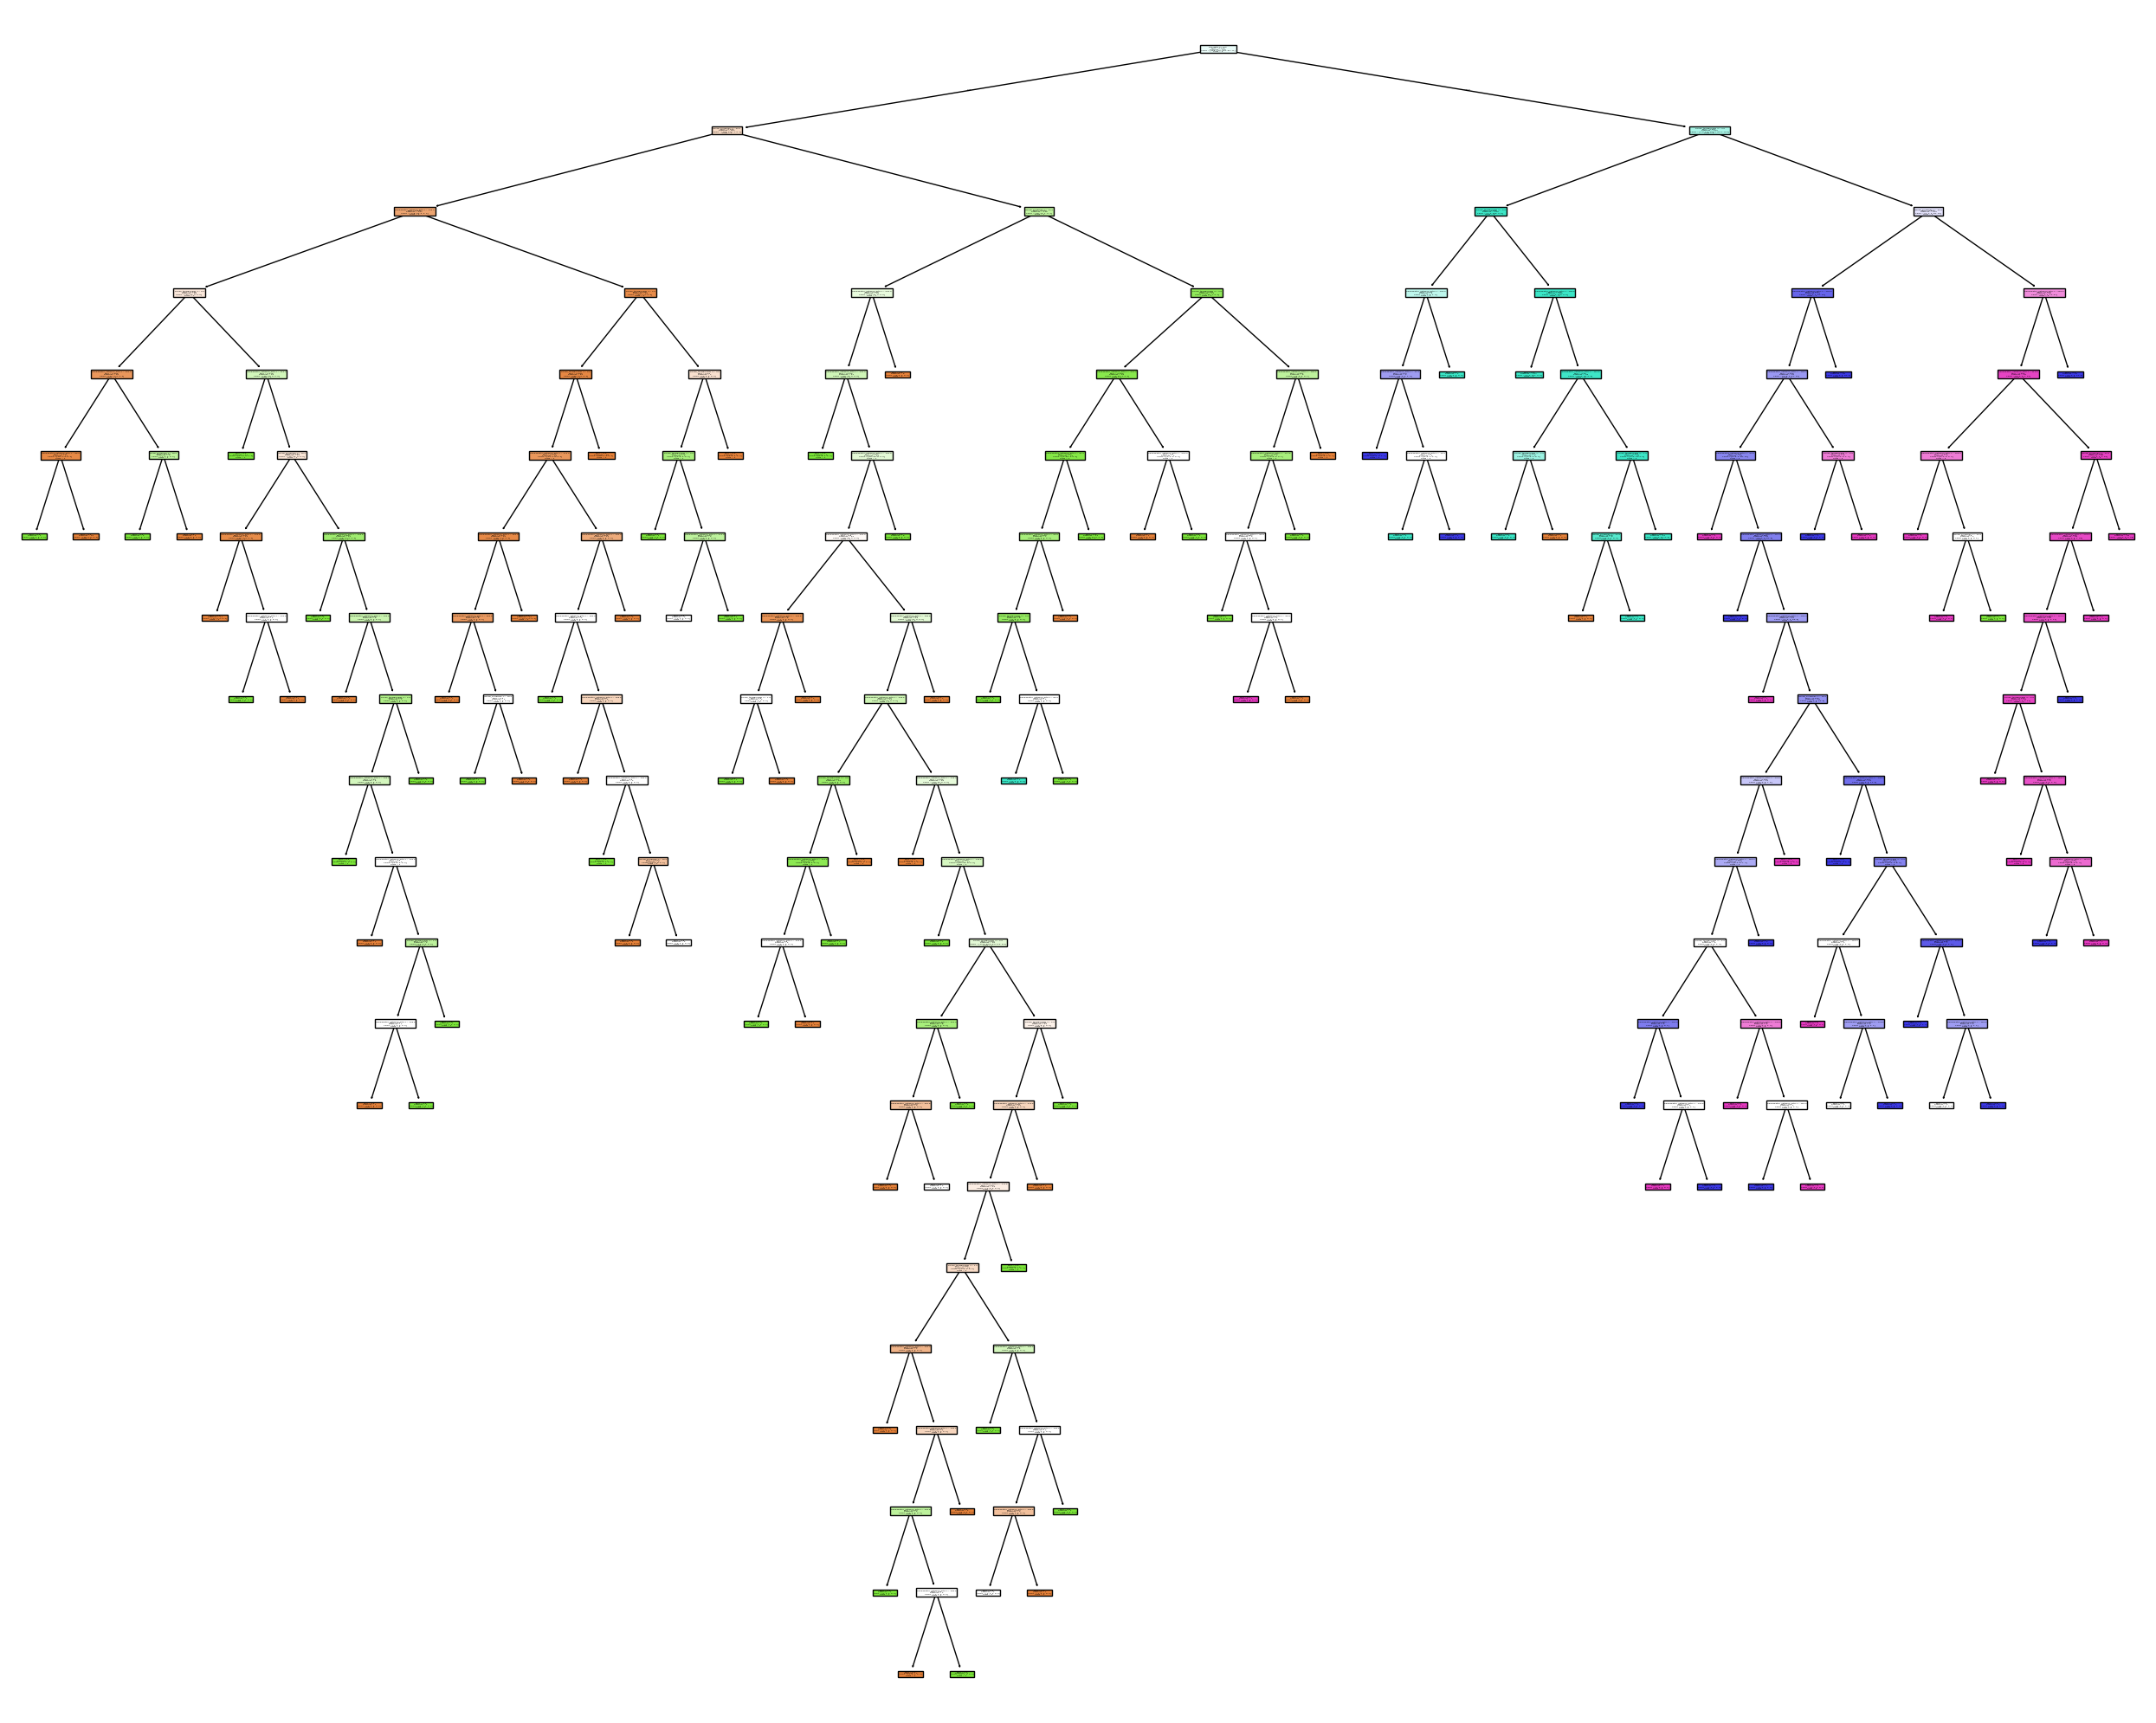

In [7]:
#membangun model
from sklearn.tree import DecisionTreeClassifier

#Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
clf.fit(X_train, y_train)

#menampilkan struktur decision tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree

feature_names = ['pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman', 'jumlah_tanggungan']

target_names = df_credit_scoring['risk_rating'].unique().tolist()

target_names=[str(x) for x in target_names]

fig = plt.figure(figsize=(25,20))
plot_tree(clf,
          feature_names=feature_names,
          class_names=target_names,
          filled=True)
plt.tight_layout()
plt.show()

# Merubah Tampilan Grafik Dalam Bentuk Text

In [8]:
#menampilkan struktur decision tree dalam bentuk teks
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 30.00
|   |   |--- feature_0 <= 145.00
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_0 <= 137.00
|   |   |   |   |   |--- feature_0 <= 88.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  88.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  137.00
|   |   |   |   |   |--- feature_2 <= 18.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_2 >  18.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- feature_0 <= 110.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  110.00
|   |   |   |   |   |--- feature_2 <= 18.00
|   |   |   |   |   |   |--- feature_0 <= 140.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  140.50
|   |   |   |   |   |   |   |--- feature_0 <= 141.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feat

# Menerapkan Random Forest

In [9]:
#membangun Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Entropy controls how a Decision Tree decides to split the data. It actually affects how a Decision Tree draws its boundaries. random_state digunakan untuk menentukan jumlah bootstrapping sample yang akan dilakukan popular random_state values are 0 and 42
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)
print('RandomForestClassifier:', rfc)

RandomForestClassifier: RandomForestClassifier(criterion='entropy', random_state=42)


In [10]:
from sklearn.metrics import f1_score

#mengevaluasi data training
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score:', f1_score(y_train, rfc_pred_train, average='micro'))

#mengevaluasi data testing
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score:', f1_score(y_test, rfc_pred_test, average='micro'))

Training Set Evaluation F1-Score: 0.9904761904761905
Testing Set Evaluation F1-Score: 0.8740740740740741
